# Demonstration of CensusData Python Library

Show the use of the CensusData Library with a simple example

In [1]:
# we will get a numpy runtime warning when loading the censusdata library -- 
# so I will supress all warnings while loading the libraries

import warnings as warn
warn.filterwarnings("ignore")

In [2]:
import sys
import pandas as pd
import matplotlib as plt
import censusdata
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [3]:
warn.resetwarnings()

In [4]:
print("python version {}".format(sys.version))

python version 3.6.5 (default, Mar 30 2018, 06:41:53) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


In [5]:
# enable in line plotting
%matplotlib inline

A Census Block Group is a geographical unit used by the United States Census Bureau which is between the Census Tract and the Census Block. It is the smallest geographical unit for which the bureau publishes sample data, i.e. data which is only collected from a fraction of all households.

In [6]:
buncombe_bgs = censusdata.geographies(censusdata.censusgeo([('state', '37'), ('county', '021'),('block group', '*')]), 'acs5', '2015')

In [7]:
print("number of block groups {}".format(len(buncombe_bgs)))

number of block groups 154


Now that we have identified the variables and geographies of interest, we can download the data using censusdata.download and compute variables for the percent unemployed and the percent with no high school degree. This code comes from the example. Note we are pulling 2015 data.

In [8]:
buncombebg = censusdata.download('acs5', '2015',
                             censusdata.censusgeo([('state', '37'), ('county', '021'), ('block group', '*')]),
                             ['B23025_003E', 'B23025_005E', 'B15003_001E', 'B15003_002E', 'B15003_003E',
                              'B15003_004E', 'B15003_005E', 'B15003_006E', 'B15003_007E', 'B15003_008E',
                              'B15003_009E', 'B15003_010E', 'B15003_011E', 'B15003_012E', 'B15003_013E',
                              'B15003_014E', 'B15003_015E', 'B15003_016E'])
buncombebg['percent_unemployed'] = buncombebg.B23025_005E / buncombebg.B23025_003E * 100
buncombebg['percent_nohs'] = (buncombebg.B15003_002E + buncombebg.B15003_003E + buncombebg.B15003_004E
                          + buncombebg.B15003_005E + buncombebg.B15003_006E + buncombebg.B15003_007E + buncombebg.B15003_008E
                          + buncombebg.B15003_009E + buncombebg.B15003_010E + buncombebg.B15003_011E + buncombebg.B15003_012E
                          + buncombebg.B15003_013E + buncombebg.B15003_014E +
                          buncombebg.B15003_015E + buncombebg.B15003_016E) / buncombebg.B15003_001E * 100
buncombebg = buncombebg[['percent_unemployed', 'percent_nohs']]
buncombebg.describe()

,percent_unemployed,percent_nohs
count,154.00,154.00
mean,7.24,10.81
std,5.52,8.16
min,0.00,0.00
25%,3.41,4.62
50%,6.70,8.70
75%,9.84,15.14
max,30.14,42.00


Next, we show the 10 block groups in Buncombe County with the highest rate of unemployment, and the percent with no high school degree in those block groups.

In [9]:
# sort in place by unemployment
buncombebg.sort_values('percent_unemployed', ascending=False, inplace=True)

In [10]:
# print the first 10 highest blockgroups
buncombebg.head(10)

,percent_unemployed,percent_nohs
"Block Group 2, Census Tract 9, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000900> block group:2",30.14,14.33
"Block Group 3, Census Tract 26.06, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:002606> block group:3",27.75,10.14
"Block Group 4, Census Tract 14, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:001400> block group:4",25.00,36.39
"Block Group 3, Census Tract 14, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:001400> block group:3",23.91,15.23
"Block Group 1, Census Tract 9, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000900> block group:1",23.57,16.67
"Block Group 3, Census Tract 20, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:002000> block group:3",21.17,7.83
"Block Group 3, Census Tract 9, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000900> block group:3",19.81,15.36
"Block Group 4, Census Tract 20, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:002000> block group:4",18.82,10.91
"Block Group 1, Census Tract 2, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000200> block group:1",15.71,12.70
"Block Group 1, Census Tract 14, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:001400> block group:1",15.27,42.00


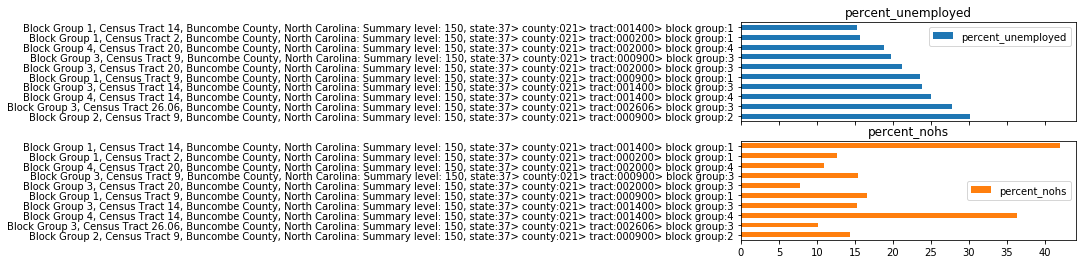

In [11]:
# plot the first 10 blockgroups
axes = buncombebg.head(10).plot.barh(rot=0, subplots=True)

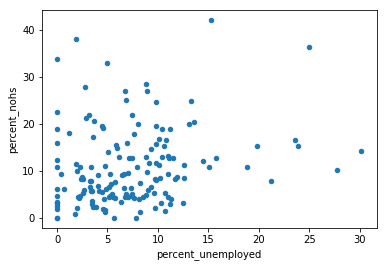

In [12]:
# scatter plot the blockgroups
buncombebg.plot.scatter(x='percent_unemployed', y='percent_nohs')

In [13]:
# correlate unemployment and no high school education
buncombebg.corr()

,percent_unemployed,percent_nohs
percent_unemployed,1.00,0.21
percent_nohs,0.21,1.00


### For this data set it appears that there is no strong relationship between % of people with no high school education and % unemployment

In [48]:
censusdata.search('acs5', '2015', 'label', 'income')

[('B06010PR_002E',
  'B06010PR. Place of Birth by Individual Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) in Puerto Rico',
  'No income'),
 ('B06010PR_002M',
  'B06010PR. Place of Birth by Individual Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) in Puerto Rico',
  'Margin of Error for!!No income'),
 ('B06010PR_003E',
  'B06010PR. Place of Birth by Individual Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) in Puerto Rico',
  'With income:'),
 ('B06010PR_003M',
  'B06010PR. Place of Birth by Individual Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) in Puerto Rico',
  'Margin of Error for!!With income:'),
 ('B06010PR_004E',
  'B06010PR. Place of Birth by Individual Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) in Puerto Rico',
  'With income:!!$1 to $9,999 or loss'),
 ('B06010PR_004M',
  'B06010PR. Place of Birth by Individual Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) 

In [59]:
censusdata.printtable(censusdata.censustable('acs5', '2015', 'B19001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19001_001E  | B19001. Household Income in th | Total:                                                   | int  
B19001_002E  | B19001. Household Income in th | Less than $10,000                                        | int  
B19001_003E  | B19001. Household Income in th | $10,000 to $14,999                                       | int  
B19001_004E  | B19001. Household Income in th | $15,000 to $19,999                                       | int  
B19001_005E  | B19001. Household Income in th | $20,000 to $24,999                                       | int  
B19001_006E  | B19001. Household Income in th | $25,000 to $29,999                                       | int  
B19001_007E  | B19001. Household Income in th | $30,000 to $34,999                           

In [61]:
censusdata.download('acs5', '2015',
                             censusdata.censusgeo([('state', '37'), ('county', '021'),('block group', '*')]),
                             ['B19001_001E'])

,B19001_001E
"Block Group 1, Census Tract 1, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000100> block group:1",860
"Block Group 1, Census Tract 2, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000200> block group:1",323
"Block Group 2, Census Tract 2, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000200> block group:2",324
"Block Group 1, Census Tract 3, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000300> block group:1",553
"Block Group 2, Census Tract 3, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000300> block group:2",307
"Block Group 1, Census Tract 4, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000400> block group:1",711
"Block Group 2, Census Tract 4, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000400> block group:2",299
"Block Group 3, Census Tract 4, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000400> block group:3",297
"Block Group 1, Census Tract 5, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000500> block group:1",571
"Block Group 2, Census Tract 5, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000500> block group:2",338


In [62]:
censusdata.printtable(censusdata.censustable('acs5', '2015', 'B25075'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25075_001E  | B25075. Value                  | Total:                                                   | int  
B25075_002E  | B25075. Value                  | Less than $10,000                                        | int  
B25075_003E  | B25075. Value                  | $10,000 to $14,999                                       | int  
B25075_004E  | B25075. Value                  | $15,000 to $19,999                                       | int  
B25075_005E  | B25075. Value                  | $20,000 to $24,999                                       | int  
B25075_006E  | B25075. Value                  | $25,000 to $29,999                                       | int  
B25075_007E  | B25075. Value                  | $30,000 to $34,999                           

In [63]:
censusdata.download('acs5', '2015',
                             censusdata.censusgeo([('state', '37'), ('county', '021'),('block group', '*')]),
                             ['B25075_001E'])

,B25075_001E
"Block Group 1, Census Tract 1, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000100> block group:1",186
"Block Group 1, Census Tract 2, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000200> block group:1",129
"Block Group 2, Census Tract 2, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000200> block group:2",175
"Block Group 1, Census Tract 3, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000300> block group:1",216
"Block Group 2, Census Tract 3, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000300> block group:2",154
"Block Group 1, Census Tract 4, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000400> block group:1",313
"Block Group 2, Census Tract 4, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000400> block group:2",99
"Block Group 3, Census Tract 4, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000400> block group:3",120
"Block Group 1, Census Tract 5, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000500> block group:1",447
"Block Group 2, Census Tract 5, Buncombe County, North Carolina: Summary level: 150, state:37> county:021> tract:000500> block group:2",165
